<h1>Introduction</h1>

The ESA-funded [SeasFire project](https://seasfire.hua.gr) is exploring the potential of spatio-temporal asynchronous links happening between pre-occurring and non-overlapping atmospheric conditions and European fire regimes to predict the seasonal burned areas sizes in Europe by leveraging two major advancements of our time:
    1) the availability of a huge amount of satellite data with a good spatio-temporal resolution, which will be used as fire drivers called the Earth system variables, and 
    2) the progress in Deep Learning (DL) and especially in graph and image based modelling frameworks, finding methods capable of capturing the spatio-temporal interactions of the Earth System variables. 

<h1>SeasFire Data Cube</h1>

This Jupyter notebook reports an example of downloading the SeasFire dataset and doing basic analytics within the SeasFire Data Cube.

The SeasFire Data Cube is a scientific datacube for seasonal fire forecasting around the globe. Apart from seasonal fire forecasting, which is the aim of the datacube, it can also be used for several other tasks. For example, it can be used to model teleconnections and memory effects in the earth system. Additionally, it can be used to model emissions from wildfires and the evolution of wildfire regimes.

<h1>Downloading the dataset</h1>

<b>1deg: (Size: 375MB approx):</b> https://drive.google.com/drive/folders/1-yqhxp98YrCeg78vEeSM58r3EXO5BWwf?usp=drive_link 

<b>0.25deg: (Size: 2GB approx):</b> https://drive.google.com/drive/folders/1IhpWRJXGOMJbtUctfnImuj7kCixpYBfC?usp=drive_link 

After accessing the dataset link, you should download and extract the package. Rename to the following and save the folder location:

<p><b>1deg:</b> data/seasfire_1deg.zarr</p>
<p><b>0.25deg:</b> data/seasfire.zarr</p>

<h1>Loading the Dataset</h1>

In [2]:
import xarray as xr
import zarr

In [5]:
ds = xr.open_zarr('../data/seasfire_1deg.zarr')
# ds = xr.open_zarr('../data/seasfire.zarr')

In [6]:
ds

<xarray.Dataset>
Dimensions:                         (latitude: 180, longitude: 360, time: 966)
Coordinates:
  * latitude                        (latitude) float64 89.5 88.5 ... -88.5 -89.5
  * longitude                       (longitude) float64 -179.5 -178.5 ... 179.5
  * time                            (time) datetime64[ns] 2001-01-01 ... 2021...
Data variables: (12/54)
    area                            (latitude, longitude) float32 dask.array<chunksize=(45, 90), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    fcci_ba                         (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 dask.array<chunksize=(966, 45, 90), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

<h4>Plot the NDVI of a particular 8-day period</h4>

CPU times: total: 656 ms
Wall time: 1.15 s


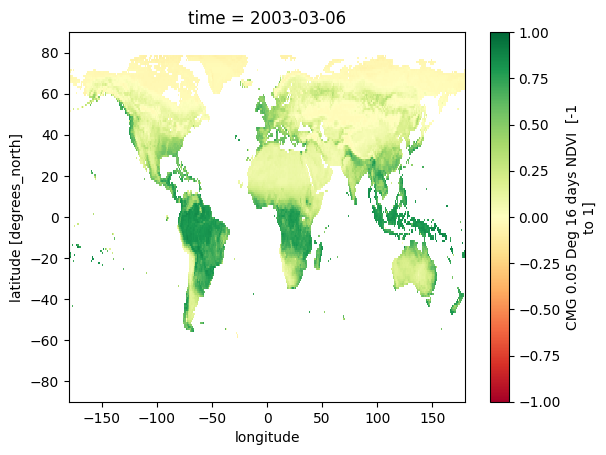

In [4]:
%%time
ds.ndvi[100].plot(cmap="RdYlGn", vmax=1, vmin=-1)

<h4>Plot the land surface temperature of a particular place for year 2019</h4>

CPU times: total: 46.9 ms
Wall time: 128 ms


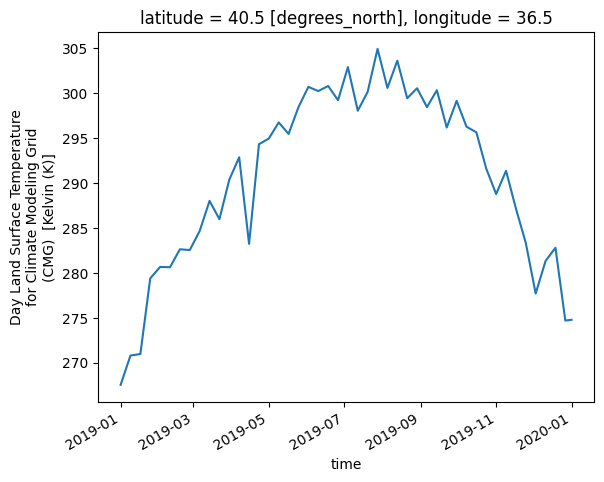

In [5]:
%%time
ds.sel(longitude=36, latitude=40, method='nearest').sel(time=slice('2019-01-01', '2020-01-01')).lst_day.plot()

<h4>How's the soil water volume (level 1) in the Mediterranean so cells that are 25% forest?</h4>

In [ ]:
%%time
ds.where(ds.lccs_class_2>25).sel(longitude=slice(-13, 33), latitude=slice(45, 31))['swvl1'].mean(dim=('longitude', 'latitude')).plot()

<h4>Let's look at the yearly mean instead</h4>

In [ ]:
%%time
ds.where(ds.lccs_class_2>25).sel(longitude=slice(-13, 33), latitude=slice(45, 31))['swvl1'].resample(time='1Y').mean().mean(dim=('longitude', 'latitude')).plot()

<h4>How much has the average sea surface temperature changed in the Mediterranean in the last 20 years?</h4>

In [ ]:
%%time
ds.sel(longitude=slice(-13, 33), latitude=slice(45, 31))['sst'].mean(dim=('longitude', 'latitude')).plot()

<h4>Let's look at the yearly mean instead</h4>

In [ ]:
%%time
ds.resample(time='1Y').mean().sel(longitude=slice(-13, 33), latitude=slice(45, 31))['sst'].mean(dim=('longitude', 'latitude')).plot()

<h4>Let's plot the time series of the total burned areas for the Mediterranean region</h4>

In [ ]:
%%time
ds.sel(longitude=slice(-13, 33), latitude=slice(45, 31))['gwis_ba'].sum(dim=('longitude', 'latitude')).plot()

<h4>What about the  𝐶𝑂2 emissions from wildfires in the same region?</h4>

In [ ]:
%%time
ds.sel(longitude=slice(-13, 33), latitude=slice(45, 31))['cams_co2fire'].mean(dim=('longitude', 'latitude')).plot()